In this notebook, we will analyze the provided dataset to uncover patterns, trends, and insights. We will use various data analysis techniques, including data cleaning, visualization, and statistical methods, to better understand the underlying information and support data-driven decision making.

In [15]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Load the movie dataset from the specified CSV file into a DataFrame
movies_df = pd.read_csv("data/TMDB_movie_dataset_v11.csv")

In [16]:

movies_df.shape
movies_df.info()
movies_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251666 entries, 0 to 1251665
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1251666 non-null  int64  
 1   title                 1251653 non-null  object 
 2   vote_average          1251666 non-null  float64
 3   vote_count            1251666 non-null  int64  
 4   status                1251666 non-null  object 
 5   release_date          1013760 non-null  object 
 6   revenue               1251666 non-null  int64  
 7   runtime               1251666 non-null  int64  
 8   adult                 1251666 non-null  bool   
 9   backdrop_path         323415 non-null   object 
 10  budget                1251666 non-null  int64  
 11  homepage              130709 non-null   object 
 12  imdb_id               629537 non-null   object 
 13  original_language     1251666 non-null  object 
 14  original_title        1251653 non-

,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,1.251666e+06,1.251666e+06,1.251666e+06,1.251666e+06,1.251666e+06,1.251666e+06,1.251666e+06
mean,8.058721e+05,1.730586e+00,1.713922e+01,6.610226e+05,4.612395e+01,2.565805e+05,1.144545e+00
std,4.294870e+05,2.951802e+00,3.035712e+02,1.881007e+07,6.134405e+01,5.211272e+06,7.236783e+00
min,2.000000e+00,0.000000e+00,0.000000e+00,-1.200000e+01,-2.800000e+01,0.000000e+00,0.000000e+00
25%,4.453852e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e-01
50%,8.154695e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.900000e+01,0.000000e+00,6.000000e-01
75%,1.189383e+06,4.000000e+00,1.000000e+00,0.000000e+00,8.700000e+01,0.000000e+00,8.410000e-01
max,1.509144e+06,1.000000e+01,3.449500e+04,5.000000e+09,1.440000e+04,1.000000e+09,2.994357e+03


In [17]:
# Check for missing values in each column of the DataFrame
movies_df.isnull().sum()

id                            0
title                        13
vote_average                  0
vote_count                    0
status                        0
release_date             237906
revenue                       0
runtime                       0
adult                         0
backdrop_path            928251
budget                        0
homepage                1120957
imdb_id                  622129
original_language             0
original_title               13
overview                 269533
popularity                    0
poster_path              416905
tagline                 1076194
genres                   524707
production_companies     700850
production_countries     579046
spoken_languages         556102
keywords                 926425
dtype: int64

In [18]:
# Display the columns of the DataFrame to understand its structure
movies_df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')

In [19]:
# Display the first few rows of the DataFrame to get an overview of the data
movies_df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


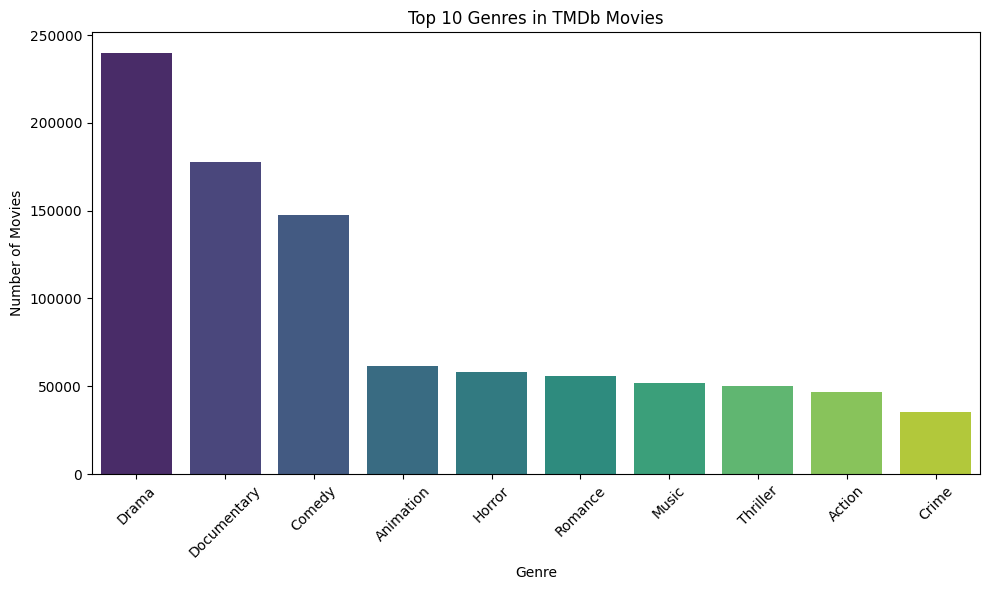

In [20]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Split, strip whitespace, and flatten
genre_lists = movies_df['genres'].dropna().str.split(',')
cleaned_genres = [genre.strip() for sublist in genre_lists for genre in sublist]

# Step 2: Count occurrences
genre_counts = Counter(cleaned_genres)

# Step 3: Convert to DataFrame and sort
top_genres = pd.DataFrame(genre_counts.items(), columns=["Genre", "Count"])
top_genres = top_genres.sort_values("Count", ascending=False)

# Step 4: Plot (with figsize added)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_genres.head(10),
    x="Genre",
    y="Count",
    hue="Genre",
    palette="viridis",
    legend=False
)
plt.title("Top 10 Genres in TMDb Movies")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/Users/vedantwalia/Desktop/Projects sandbox/analysing-box-office-data/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


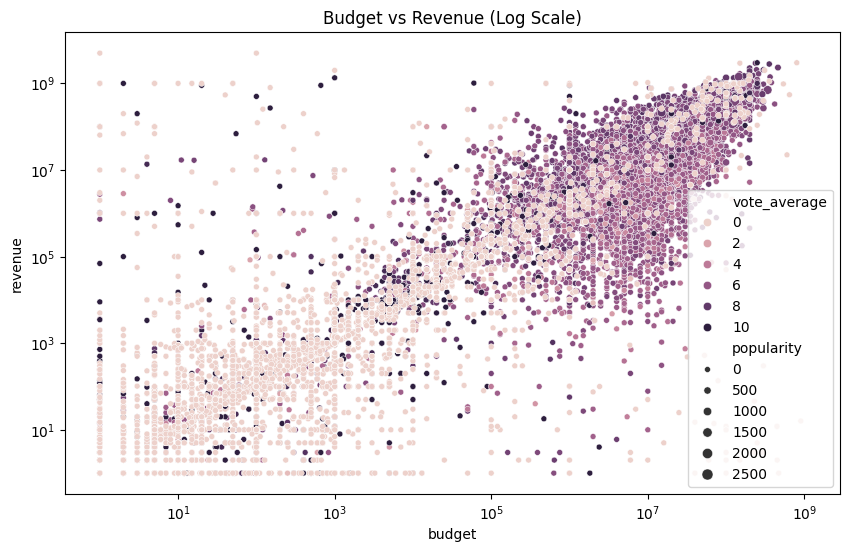

In [21]:
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies_df, x='budget', y='revenue', hue='vote_average', size='popularity')
plt.xscale('log')
plt.yscale('log')
plt.title("Budget vs Revenue (Log Scale)")
plt.show()

## 📊 Final Conclusion from EDA

### 🎬 1. Genre Distribution is Skewed Toward Drama and Documentaries
- The bar plot shows that **Drama** is the most frequent genre, followed by **Documentary** and **Comedy**.
- Action-heavy genres like **Thriller**, **Action**, and **Crime** are present but not dominant.
- This suggests a large portion of the dataset may consist of **indie or low-budget productions**, which typically lean towards Drama or Documentary genres.

📌 *Implication:* The genre imbalance should be considered when building models like recommender systems, as certain genres may be underrepresented.

---

### 💰 2. Budget vs Revenue Shows a Clear Positive Correlation
- The scatter plot (log-log scale) reveals a strong **positive trend** between a movie’s **budget and its revenue**.
- **High-budget movies** tend to generate higher revenue, though there are exceptions — especially low-budget hits.
- Color (vote_average) and size (popularity) encoding show that **well-rated, popular movies** often cluster in the upper-right quadrant.

📌 *Implication:* Budget is a powerful indicator of commercial success and can be used as a key feature in predictive models.

---

### ✅ Overall Takeaway
This EDA provides valuable insights:
- **Genre imbalance** is notable and can affect model bias.
- **Budget and popularity strongly influence revenue**, validating their role in success prediction.
- These findings set the stage for:
  - Building a **movie recommender system**
  - Modeling **revenue prediction**
  - Grouping movies by genre or production scale

In [22]:
import pandas as pd

# Fill nulls with empty strings
movies_df['overview'] = movies_df['overview'].fillna('')
movies_df['genres'] = movies_df['genres'].fillna('')
movies_df['tagline'] = movies_df['tagline'].fillna('')

# Combine features (you can add more fields like 'keywords' or 'cast' if available)
movies_df['combined_features'] = (
    movies_df['genres'] + ' ' + 
    movies_df['overview'] + ' ' + 
    movies_df['tagline']
)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies_df['combined_features'])

In [24]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

KeyboardInterrupt: 

In [25]:
# Reverse map of movie titles to indices
indices = pd.Series(movies_df.index, index=movies_df['title']).drop_duplicates()

def recommend(title, num_recommendations=5):
    idx = indices.get(title)
    if idx is None:
        return pd.DataFrame(columns=['title', 'score'])
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations+1]  # skip itself

    movie_indices = [i[0] for i in sim_scores]
    score_values = [i[1] for i in sim_scores]

    return movies_df[['title']].iloc[movie_indices].assign(score=score_values)

In [26]:
recommend("The Dark Knight", 5)

NameError: name 'cosine_sim' is not defined